In [1]:
#This analysis is performed using JUPYTER NOTEBOOK.
#Done by Santhanabalan For KIC Task.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('IRIS.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data['species'].value_counts()


Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

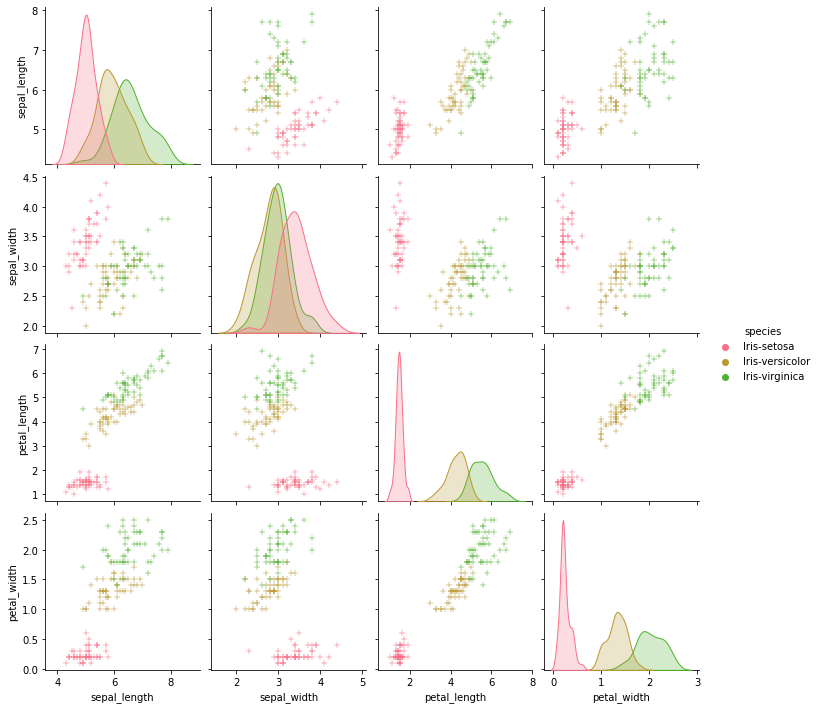

In [7]:
g = sns.pairplot(data, hue='species', markers='+')
plt.show()

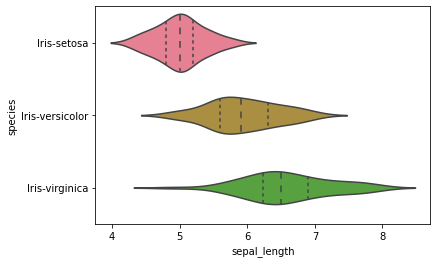

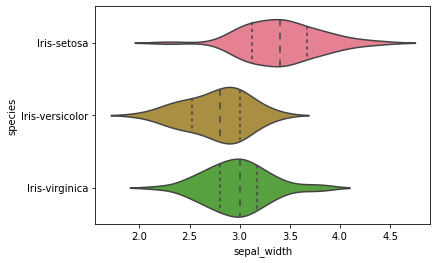

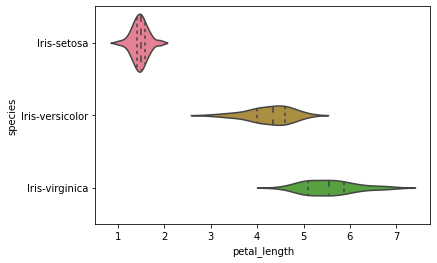

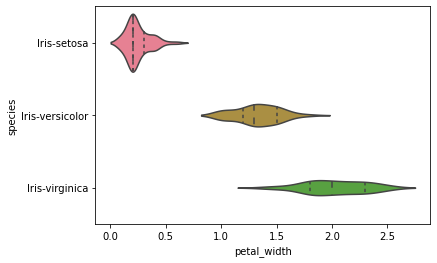

In [8]:
g = sns.violinplot(y='species', x='sepal_length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=data, inner='quartile')
plt.show()

In [9]:
X = data.drop(['species'], axis=1)
y = data['species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [11]:
# Model Name: K Nearest Neighbor
#experimenting with value n=3
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [12]:
# Model Name: Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [13]:
# Model Name: Gaussian Naive Bayes
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [14]:
# Model Name: Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [15]:
# Model Name: Stochastic Gradient Descent (SGD)
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [16]:
# Model Name: Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [17]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Stochastic Gradient Decent', 'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
96.67,KNN
96.67,Logistic Regression
96.67,Naive Bayes
53.33,Stochastic Gradient Decent


In [18]:
print("Hence different Machine Learning models were implemented on IRIS dataset and the accuracy rates were observed.")

Hence different Machine Learning models were implemented on IRIS dataset and the accuracy rates were observed.
